# Investigate a Dataset (TMBd Movie Data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I will conduct a data analysis over The Movie Database (TMDb) and create a file to share that documents the findings. This data set contains information about 10,000 movies collected from TMDb, including over 20 indicators. This document will go through each step from data wrangling, statistical analyse, data visualize to draw conclusions.
>
### some questions include:
> + Which genres are most popular from year to year?
+ What kinds of properties are associated with movies that have high revenues?
+ What is the realtionship between movie runtime and average vote?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> Purpose: load in the data, check for cleanliness, and then trim and clean dataset for analysis

### General Properties

In [2]:
# Load data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

In [3]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# draw initial information to better understand data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> This indicate there are 10866 records (with duplicates and missing values) and 21 columns, each with their data types and valid records number.

### Data Cleaning
> + drop columns

In [6]:
# find columns indexes

In [7]:
pd.DataFrame(df.columns)

,0
0,id
1,imdb_id
2,popularity
3,budget
4,revenue
5,original_title
6,cast
7,homepage
8,director
9,tagline


In [8]:
# drop columns we don't need

In [9]:
coldrop = df.iloc[:,np.r_[1,3:12,14:17]].columns
df.drop(coldrop, axis = 1,inplace = True)

In [10]:
# check if the result is right

In [11]:
df.head()

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09


> + drop/fill NaN

In [12]:
# check and locate NaN values

In [13]:
df.isnull().any()

id              False
popularity      False
runtime         False
genres           True
vote_average    False
release_year    False
budget_adj      False
revenue_adj     False
dtype: bool

In [14]:
df[df['genres'].isnull()]

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
424,363869,0.244648,100,NaN,6.1,2015,0.00000,0.0
620,361043,0.129696,90,NaN,5.0,2015,0.00000,0.0
997,287663,0.330431,44,NaN,6.8,2014,0.00000,0.0
1712,21634,0.302095,88,NaN,7.4,2009,0.00000,0.0
1897,40534,0.020701,76,NaN,7.0,2009,0.00000,0.0
2370,127717,0.081892,0,NaN,5.8,2010,0.00000,0.0
2376,315620,0.068411,62,NaN,7.7,2010,0.00000,0.0
2853,57892,0.130018,110,NaN,7.2,2001,0.00000,0.0
3279,54330,0.145331,96,NaN,6.1,2008,0.00000,0.0
4547,123024,0.520520,220,NaN,8.3,2012,0.00000,0.0


In [15]:
# because these records lack information on budget_adj, revenue_adj
# in addition to 23 records won't have big impact on large sample size
# it makes more sense to drop them

In [16]:
df.dropna(inplace = True)

> + drop duplicates

In [17]:
df.drop_duplicates(inplace = True)

> + breakdown 'genres'

In [18]:
# one movie can be categorized in multiple genres, so we need to break them down
# pick out the ones have more than on genres

In [19]:
multigenres = df[df['genres'].str.contains('\|')]
multigenres

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,124,Action|Adventure|Science Fiction|Thriller,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,120,Action|Adventure|Science Fiction|Thriller,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,119,Adventure|Science Fiction|Thriller,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,136,Action|Adventure|Science Fiction|Fantasy,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,137,Action|Crime|Thriller,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...
10858,31918,0.317824,126,Comedy|War,5.5,1966,0.000000e+00,0.000000e+00
10859,20620,0.089072,100,Mystery|Science Fiction|Thriller|Drama,6.6,1966,0.000000e+00,0.000000e+00
10862,20379,0.065543,176,Action|Adventure|Drama,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,0.065141,94,Mystery|Comedy,6.5,1966,0.000000e+00,0.000000e+00


In [20]:
# looks like one movie can have upto four genres
# so we make four copies
# create function

In [21]:
def func(genre_index):
    '''make copies'''
    dfx = multigenres.copy(deep = True)
    '''assign movies into each df with only one kind of genre'''
    dfx['genres'] = dfx['genres'].apply(lambda x: x.split('|')[genre_index])
    return dfx

In [22]:
# excute function

In [23]:
df1 = func(0)
df2 = func(1)
df3 = func(-1)
df4 = func(-2)

In [24]:
# append four dataframes together then drop duplicates

In [25]:
new_rows = df4.append(df3.append(df1.append(df2)))
new_rows.drop_duplicates(inplace= True)

In [26]:
# check for duplicates

In [27]:
new_rows.duplicated().any()

False

In [28]:
# drop multigenres from original df
# then append new_rows to original df

In [29]:
df.drop(multigenres.index,inplace = True)

In [30]:
df = df.append(new_rows)

In [31]:
# check for duplicates

In [32]:
df.duplicated().any()

False

In [33]:
df.head()

,id,popularity,runtime,genres,vote_average,release_year,budget_adj,revenue_adj
25,177677,4.566713,131,Action,7.1,2015,1.379999e+08,6.277435e+08
26,214756,4.564549,115,Comedy,6.3,2015,6.255997e+07,1.985944e+08
51,257211,2.814802,121,Comedy,7.1,2015,3.219999e+07,1.789994e+08
55,295964,2.584264,100,Drama,6.3,2015,1.839999e+07,3.367819e+07
58,306819,2.557859,120,Drama,7.3,2015,1.379999e+07,5.905618e+07


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (Which genres are most popular from year to year?)

In [34]:
# aggregation

In [35]:
ser = df.groupby(['release_year','genres'])['popularity'].mean()
ser

release_year  genres         
1960          Action             0.590724
              Adventure          0.700981
              Comedy             0.396000
              Crime              0.346480
              Drama              0.587631
                                   ...   
2015          Science Fiction    2.207762
              TV Movie           0.260574
              Thriller           1.401877
              War                1.284511
              Western            3.178796
Name: popularity, Length: 1046, dtype: float64

In [36]:
# unstuck multi-index series

In [37]:
newdf = ser.unstack()
newdf.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960,0.590724,0.700981,NaN,0.396000,0.346480,NaN,0.587631,0.278064,0.144106,NaN,0.412364,0.591450,0.423531,NaN,0.541227,0.327905,NaN,0.811910,0.225863,0.567759
1961,0.407956,0.767323,2.631987,0.679838,0.806519,NaN,0.432233,0.755722,0.154073,0.113651,0.347784,0.254578,0.564749,0.712793,0.426036,0.274103,NaN,NaN,0.531184,0.210021
1962,0.708945,0.942513,NaN,0.282594,0.472816,NaN,0.392000,0.323463,0.235542,0.235542,0.600060,0.179368,0.323933,0.259220,0.365621,0.179212,NaN,0.760582,0.506162,0.414180
1963,0.951729,0.728487,2.180410,0.444481,0.526983,NaN,0.322448,0.852632,0.214071,0.351647,0.420715,0.376901,NaN,0.421033,0.399573,0.467836,NaN,0.719929,0.664326,0.246957
1964,0.813087,0.736431,0.445746,0.491229,0.249436,NaN,0.364818,1.106397,0.599791,0.152209,0.316377,0.224485,0.753799,0.308091,0.221586,0.226636,NaN,0.622580,0.930959,0.127679


In [38]:
# lineplot to show consistent changes over years

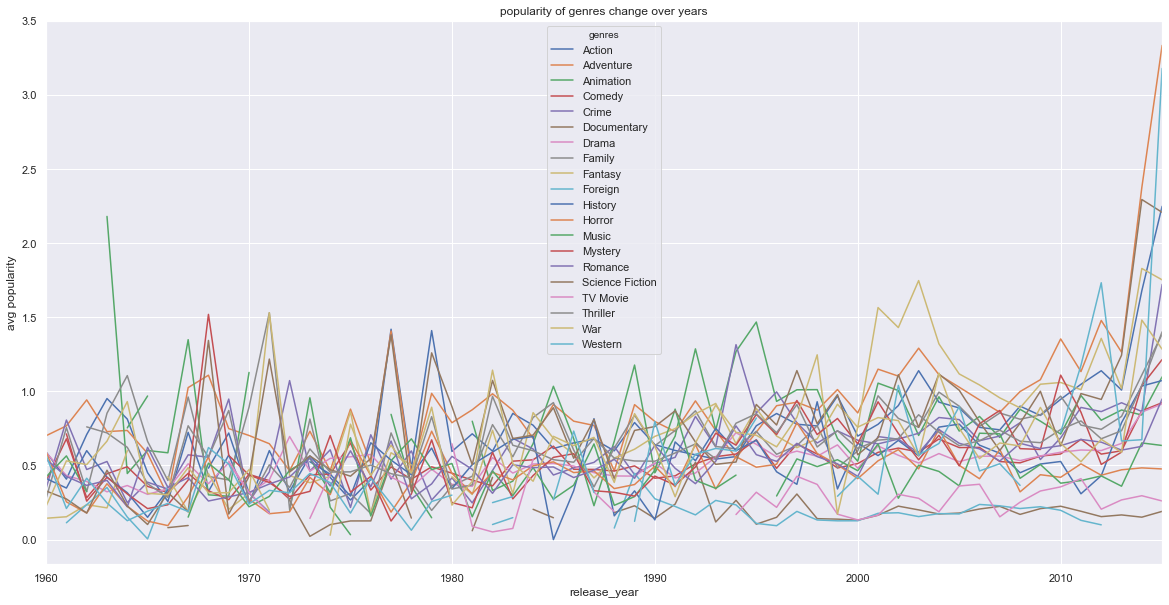

In [39]:
newdf.plot(figsize= (20,10))
plt.title('popularity of genres change over years')
plt.ylabel('avg popularity');

> Although line plot can give a general idea how each genre's popularity changed over years, it is hard to read with so many genres

In [40]:
# create a series 'value' to aggregate max
# average_popularity by year

In [41]:
value = newdf.max(axis = 1)
value.head()

release_year
1960    0.811910
1961    2.631987
1962    0.942513
1963    2.180410
1964    1.106397
dtype: float64

In [42]:
# convert series 'value' to DataFram

In [43]:
value = pd.DataFrame(value, columns = ['average_popularity'])
value.head()

,average_popularity
release_year,
1960,0.811910
1961,2.631987
1962,0.942513
1963,2.180410
1964,1.106397


In [44]:
# create a series 'genre' to aggregate genre
# with max avg popularity by year
# then convert series 'genre' to DataFram

In [45]:
genre = newdf.idxmax(axis = 1)
genre = pd.DataFrame(genre, columns= ['genres'])
genre.head()

,genres
release_year,
1960,Thriller
1961,Animation
1962,Adventure
1963,Animation
1964,Family


In [46]:
# merge two dataframs together

In [47]:
mergedf = pd.merge(genre, value, left_index = True, right_index = True)
mergedf

,genres,average_popularity
release_year,,
1960,Thriller,0.811910
1961,Animation,2.631987
1962,Adventure,0.942513
1963,Animation,2.180410
1964,Family,1.106397
1965,Music,0.968850
1966,Animation,0.585717
1967,Animation,1.348805
1968,Mystery,1.519456


> We can see each year's highest average popularity genres alone with their average popularity score.

In [48]:
# bar chart of frequency of each genre to be the most popular kind

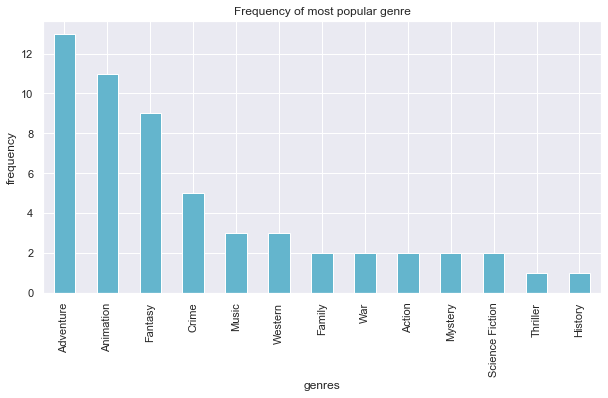

In [49]:
mergedf['genres'].value_counts().plot(kind = 'bar',figsize = (10,5), color = 'c')
plt.title('Frequency of most popular genre')
plt.xlabel('genres')
plt.ylabel('frequency');

> This shows 'Adventure' movie is the most frequent type to be top popular over the whole time while 'Thriller' and/or 'History' movie happen to be most popular type the least times.

### Research Question 2  (What kinds of properties are associated with movies that have high revenues?)

In [50]:
# first get a overall look at revenue

In [51]:
df.describe()

,id,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,26414.000000,26414.000000,26414.000000,26414.000000,26414.000000,2.641400e+04,2.641400e+04
mean,59202.577345,0.704349,102.803740,5.957950,2000.746460,2.077508e+07,6.034543e+07
std,87174.025636,1.117949,30.249201,0.912528,12.763456,3.791301e+07,1.611627e+08
min,5.000000,0.000065,0.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10214.000000,0.223890,90.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,18282.000000,0.409708,99.000000,6.000000,2005.000000,4.528410e+01,0.000000e+00
75%,59435.000000,0.773184,112.000000,6.600000,2011.000000,2.642641e+07,4.316743e+07
max,417859.000000,32.985763,900.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [52]:
# we find out there are lots of records with zero revenue values
# we will only consider the ones with valid values

In [53]:
revenue = df.query('revenue_adj != 0')
revenue.describe()

,id,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
count,12372.000000,12372.000000,12372.000000,12372.000000,12372.000000,1.237200e+04,1.237200e+04
mean,40207.395651,1.116260,108.483592,6.138385,2000.483026,3.988373e+07,1.288364e+08
std,67762.066508,1.496631,21.819987,0.789033,11.573300,4.688267e+07,2.159405e+08
min,5.000000,0.001117,15.000000,2.100000,1960.000000,0.000000e+00,2.370705e+00
25%,7446.000000,0.408464,95.000000,5.600000,1993.000000,4.228803e+06,1.311980e+07
50%,11678.000000,0.717479,105.000000,6.200000,2004.000000,2.432599e+07,5.052151e+07
75%,37724.250000,1.275381,118.000000,6.700000,2010.000000,5.772227e+07,1.499921e+08
max,417859.000000,32.985763,705.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [54]:
# we can find out how correlated each variable to revenue

In [55]:
revenue.corr()

,id,popularity,runtime,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,0.158271,-0.023723,0.014079,0.488527,-0.119996,-0.092869
popularity,0.158271,1.000000,0.196077,0.300726,0.187620,0.434101,0.562051
runtime,-0.023723,0.196077,1.000000,0.307192,-0.099269,0.296421,0.263969
vote_average,0.014079,0.300726,0.307192,1.000000,-0.095676,0.064945,0.262432
release_year,0.488527,0.187620,-0.099269,-0.095676,1.000000,0.120459,-0.073460
budget_adj,-0.119996,0.434101,0.296421,0.064945,0.120459,1.000000,0.588083
revenue_adj,-0.092869,0.562051,0.263969,0.262432,-0.073460,0.588083,1.000000


> looks like budget has noticeable positive realtionship with revenue

In [56]:
# next we separate records into two groups according to whether they are above the mean or not

In [57]:
hrev = revenue.query('revenue_adj > 1.288364e+08')
lrev = revenue.query('revenue_adj <= 1.288364e+08')

In [58]:
# find the average budget of each group

In [59]:
x1 = hrev['budget_adj'].mean()
x2 = lrev['budget_adj'].mean()
x1,x2

(82498621.75080994, 22964811.17003899)

In [60]:
# we will make a barcahrt about average budget for each group
# to confirm the relationship

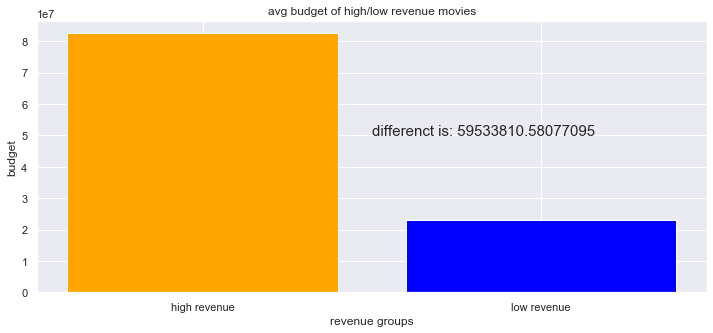

In [61]:
plt.figure(figsize = (12,5))
plt.bar((1,2),(x1,x2), tick_label = ('high revenue','low revenue'),color= ('orange','blue'))
plt.text(1.5,5*1e7, r'differenct is: {}'.format(x1-x2), fontsize=15)
plt.title('avg budget of high/low revenue movies')
plt.xlabel('revenue groups')
plt.ylabel('budget');

> the barchart indicates high revenue movies generally have higher budget than low revenue movies. And the difference is alomst 60 million.

### Research Question 3  (Is the move longer the vote higher?)

In [62]:
# select records with runtime is not 0

In [63]:
length = df.query('runtime != 0 ')

In [64]:
# correlationship chart

In [65]:
length[['vote_average','runtime']].corr()

,vote_average,runtime
vote_average,1.000000,0.158125
runtime,0.158125,1.000000


In [66]:
# make scatterplot

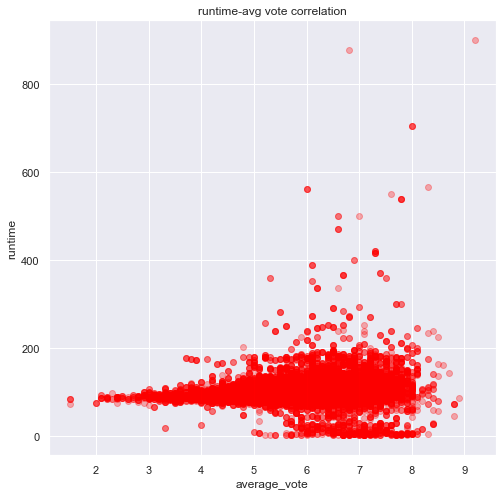

In [67]:
x = length['vote_average']
y = length['runtime']
plt.figure(figsize = (8,8))
plt.scatter(x, y, color = 'red', alpha = .3)
plt.title('runtime-avg vote correlation')
plt.xlabel('average_vote')
plt.ylabel('runtime');

> scatterplot has the same result as correlationship chart, which indicates runtime and average vote have a positive relationship but it is not very strong

In [68]:
# trend of movie average runtime each year

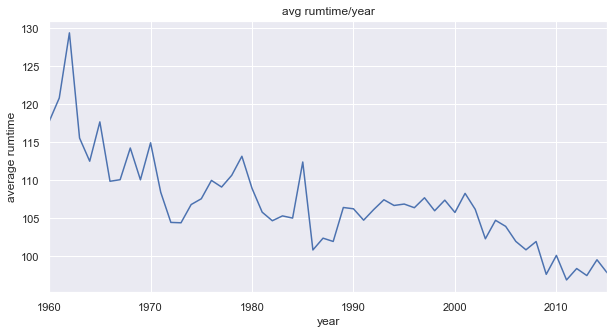

In [69]:
length.groupby(['release_year'])['runtime'].mean().plot(figsize = (10,5))
plt.title('avg rumtime/year')
plt.xlabel('year')
plt.ylabel('average rumtime');

<a id='conclusions'></a>
## Conclusions
> Throughout investigation we discovered initial correlationships between different variables. 
With an increasing trend, 'Adventure' movie has been the most popular kind among 'top average popular genre'. Moive revenue and budget have a positive correlationship and the budget difference could be significant. With movie seems long and long these years, surprisely the trend shows movie length has been decreasing. Inaddition, runtime and average vote have a positive relationship but it is not very strong.

> limitations:
+ When we dealt with Nan and missing values, we simply dropped the records, there could be a better way to deal with Nan and missing values with further statistical test and investigate.
+ When we broke down genres for each movie, we 'duplicated' those records in other categories, this could affect the accuracy of some aggregations and calculations.